## Random Forest Model for Costa Rican Poverty Level Predicion
Written by: Andrew Dunn

### Outline of Notebook
**[1. Project Set-Up](#project-set-up)** \
*[1.1 Load Packages and Data](#1.1-load-packages-and-data)* \
*[1.2 Prep the data](#1.2-prep-the-data)* \
\
**[2. What is a Random Forest Model?](#2.-model-testing)** \
*[2.1 Summary of Approach](#2.1-summary-of-approach)* \
*[2.2 Summary of Findings](#2.2-summary-of-findings)* \
\
**[3. Models](#3.-models)** \
*[3.1 Conduct Random Search Cross Validation](#3.1-conduct-random-search-cross-validation)* \
*[3.2 Conduct Random Search Cross Validation on Resampled Data](#3.2-conduct-random-search-cross-validation-on-resampled-data)* \
*[3.3 Conduct Random Search Cross Validation on SMOTE data](#3.3-conduct-random-search-cross-validation-on-smote-data)* \
\
**[4. Limitations and Next Steps](#4.-limitations-and-next-steps)** 


## 1. Project Set-Up

### 1.1 Load Packages and Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SVMSMOTE
from collections import Counter
import pprint

import load_data
from evaluate_classification import evaluate_classification


### 1.2 Prep the data

In [23]:
SEED = 0

df, X_valid, y_valid = load_data.load_train_data()
X = df.iloc[:, :-1]
y = df.loc[:, 'Target']


# Create oversampled dataframes
train_X_resampled, train_y_resampled = load_data.gen_oversample_date()
X_smote, y_smote = load_data.gen_SMOTE_data()

### 2. What is a Random Forest Model?

A Random Forest model is a machine learning algorithm that creates many decision trees and averages the results from them. Because of this, random forests have the benefit over decision trees of being less likely to overfit on the training data. They are frequently used for classification questions. 

We apply this to our Target column, which has values 1-4, representing the different levels of poverty.

#### 2.1 Summary of Approach


We run random search cross validation on three different sets of data: 
- the raw cleaned data
- data where we randomly oversample from the underrepresented classes
- data where we apply the SMOTE methodology to generate additional rows for the underrepresented classes


The random search cross validation process randomly selects different combinations of hyperparameters and returns the best fitting.

### 2.2 Summary of Findings

Thus far, there is no significant difference between the models run on the different datasets. The best performing models from the random search cross validation process yields an accuracy of about .65 and an f1 score of about .59 when run on the validation data.

## 3. Models

### 3.1 Basic Models

Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.16 Label 2: 0.28 Label 3: 0.03 Label 4: 0.94


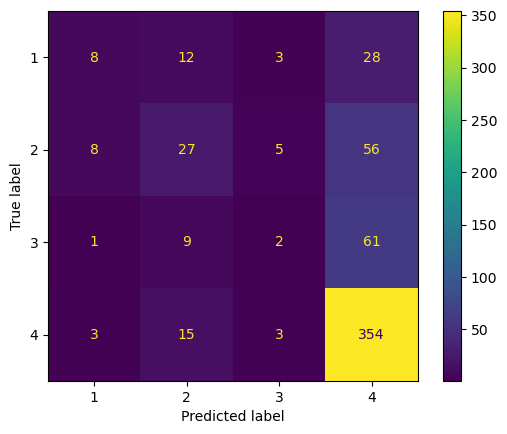

In [24]:
# test of default model
clf = RandomForestClassifier(random_state= SEED)
clf.fit(X, y)

y_pred = clf.predict(X_valid)
evaluate_classification(y_pred, y_valid, cm=True)

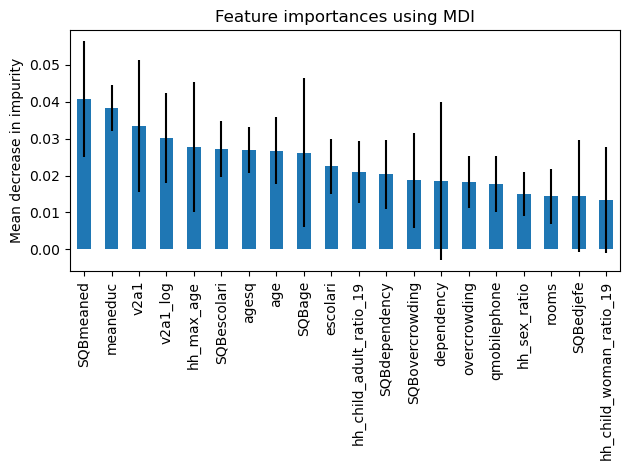

In [25]:
# Make graph of feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = X.columns.values.tolist()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

# top 20 features
top_20 = forest_importances.nlargest(20)
indices = np.where(np.in1d(forest_importances, top_20))[0]

fig, ax = plt.subplots()
top_20.plot.bar(yerr=std[indices], ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [26]:
# test number of trees in forest
#num_trees = [100, 200, 300, 400, 500, 1000, 1500, 2000]
num_trees = [i for i in range(100, 2100, 100)]
accuracy_lst = []
f1_lst = []
recall_lst_1 = []
recall_lst_2 = []
recall_lst_3 = []
recall_lst_4 = []

for i in num_trees:
    clf = RandomForestClassifier(n_estimators = i,
                                random_state = SEED)
    clf.fit(X, y)
    y_pred = clf.predict(X_valid)

    accuracy, f1, recall = evaluate_classification(y_pred, y_valid, return_vals = True)
    
    accuracy_lst.append(accuracy)
    f1_lst.append(f1)
    recall_lst_1.append(recall[0])
    recall_lst_2.append(recall[1])
    recall_lst_3.append(recall[2])
    recall_lst_4.append(recall[3])


Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.16 Label 2: 0.28 Label 3: 0.03 Label 4: 0.94
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.14 Label 2: 0.29 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.65
F1 Score: 0.58
Recall: Label 1: 0.12 Label 2: 0.26 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.3 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.31 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.31 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.3 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.65
F1 Score: 0.58
Recall: Label 1: 0.12 Label 2: 0.3 Label 3: 0.01 Label 4: 0.94
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.29 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.31 Label 3: 0.01 Label 4: 0.95
Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.

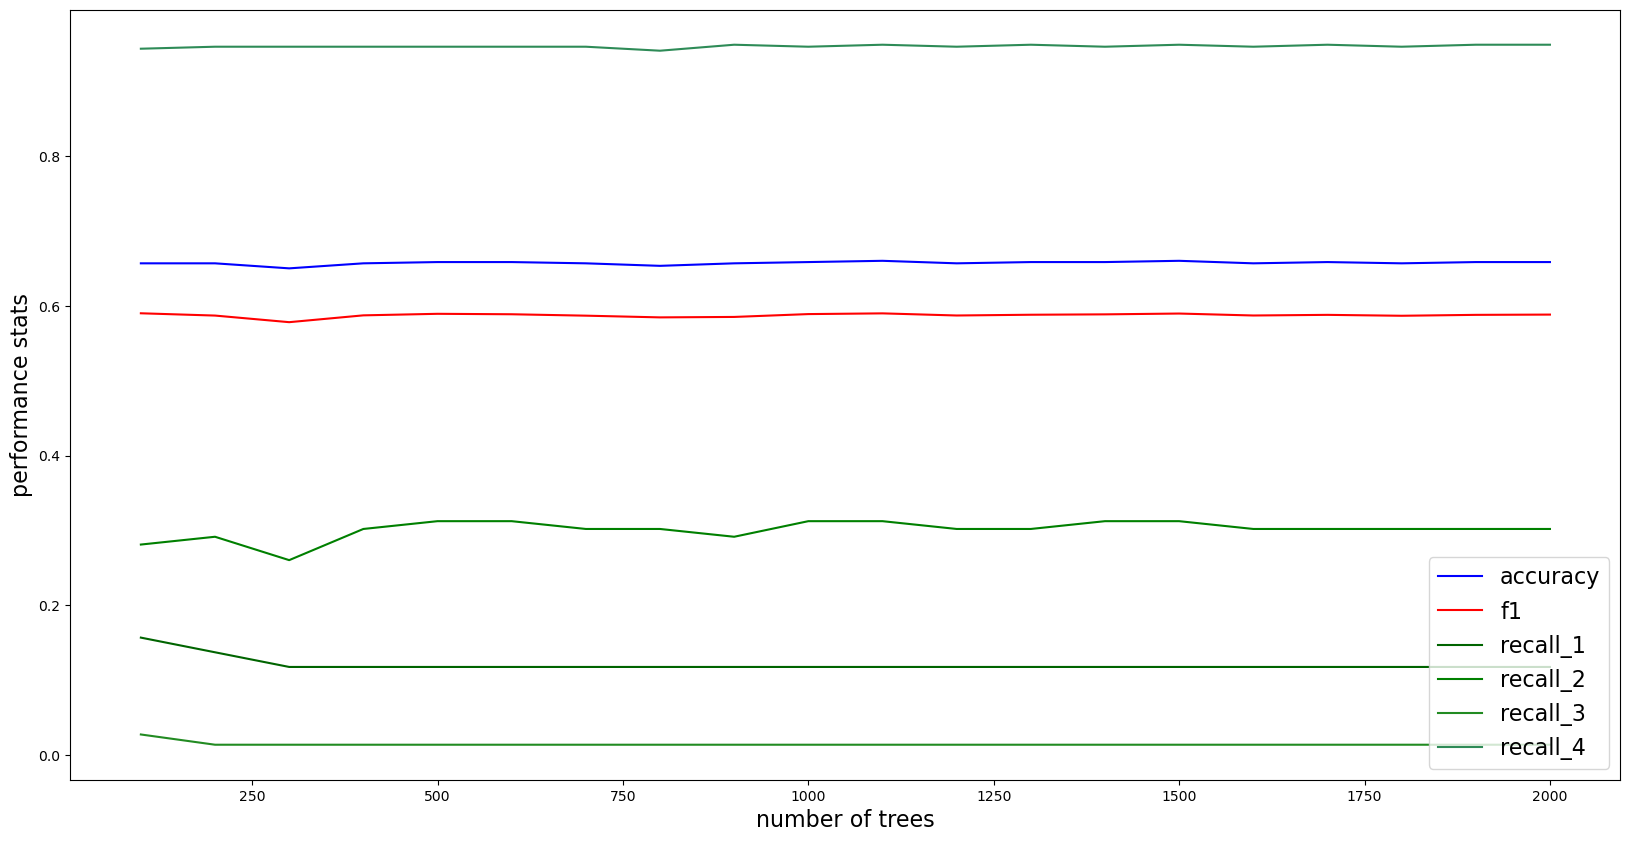

In [27]:
# plot the stats
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

plt.plot(num_trees, accuracy_lst, label = 'accuracy', color = 'blue')
plt.plot(num_trees, f1_lst, label = 'f1', color = 'red')
plt.plot(num_trees, recall_lst_1, label = 'recall_1', color = 'darkgreen')
plt.plot(num_trees, recall_lst_2, label = 'recall_2', color = 'green')
plt.plot(num_trees, recall_lst_3, label = 'recall_3', color = 'forestgreen')
plt.plot(num_trees, recall_lst_4, label = 'recall_4', color = 'seagreen')



ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("number of trees", fontsize=16)
ax.set_ylabel("performance stats", fontsize=16)
plt.show()


### 3.1 Conduct Random Search Cross Validation 

In [7]:
# Look via randomized search on the raw cleaned data
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [8]:
clf = RandomForestClassifier(random_state= SEED)

rf_random = RandomizedSearchCV(estimator = clf, 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose = 2,
                                 random_state= SEED, 
                                 n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.12 Label 2: 0.3 Label 3: 0.01 Label 4: 0.96


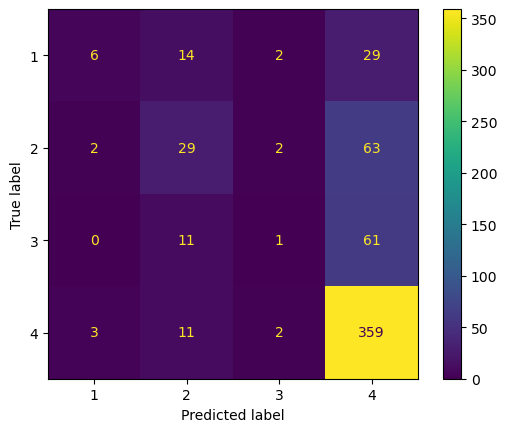

In [9]:
# Evaluate the best random model
best_random = rf_random.best_estimator_
best_random.fit(X, y)
y_pred = best_random.predict(X_valid)
evaluate_classification(y_pred, y_valid, cm = True)

### 3.2 Conduct Random Search Cross Validation on Resampled Data

In [10]:
# Run on the resampled data
clf = RandomForestClassifier(random_state= SEED)

rf_rs_random = RandomizedSearchCV(estimator = clf, 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose = 2,
                                 random_state= SEED, 
                                 n_jobs = -1)
# Fit the random search model
rf_rs_random.fit(train_X_resampled, train_y_resampled)

rf_rs_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.16 Label 2: 0.28 Label 3: 0.03 Label 4: 0.94


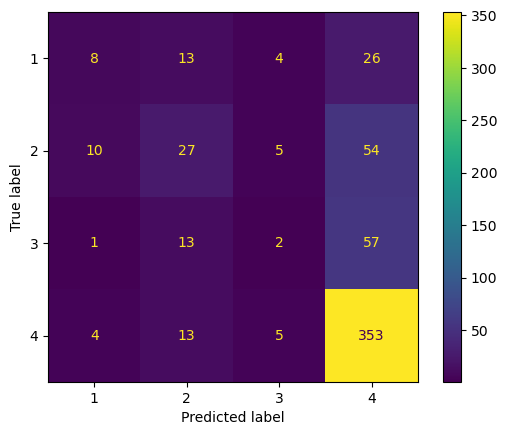

In [11]:
# Evaluate the best random model on randomly resampled data
best_rs_random = rf_rs_random.best_estimator_
best_rs_random.fit(X, y)
y_pred = best_rs_random.predict(X_valid)
evaluate_classification(y_pred, y_valid, cm = True)

### 3.3 Conduct Random Search Cross Validation on SMOTE data

In [12]:
# Run on the SMOTE data
clf = RandomForestClassifier(random_state= SEED)

rf_smote_random = RandomizedSearchCV(estimator = clf, 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose = 2,
                                random_state= SEED, 
                                n_jobs = -1)
# Fit the random search model
rf_smote_random.fit(X_smote, y_smote)

rf_smote_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   4.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/andrewdunn/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  27.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  21.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  20.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  27.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  22.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  25.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   9.0s
[CV] END bootstrap=True, max_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

Accuracy: 0.66
F1 Score: 0.59
Recall: Label 1: 0.16 Label 2: 0.28 Label 3: 0.03 Label 4: 0.94


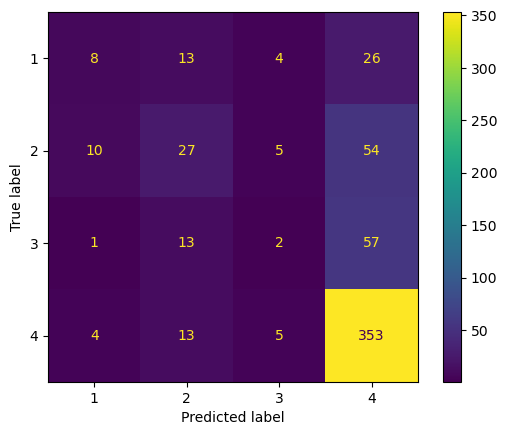

In [13]:
# Evaluate the best random model on randomly resampled data
best_smote_random = rf_smote_random.best_estimator_
best_smote_random.fit(X, y)
y_pred = best_smote_random.predict(X_valid)
evaluate_classification(y_pred, y_valid, cm = True)

## 4. Limitations and Next Steps

This analysis only initially examines different random forest models. Further attention should be paid to the data preprocessing and feature generation to ensure that the data inputs are as high quality and possible. The models clearly do well at predicted label #4, but appear to do a worse job of categorizing the other labels. 

Next steps include further testing of different versions of this random forest models and different combinations of hyperparamters, as well as examining if there are ways to better categorize the labels other than 4.